In [1]:
import os
os.chdir('../')

from visualization import Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
project = 'rehersal Alexnet CIFAR10 Task IL CL v2'

UID=['rehearsal_dataset', 'dataset', 'classes_per_task', 'contrastive_epochs']
viz = Visualization(project=project, UID=UID)

In [3]:
viz.extract_all_runs_metrics_after_task_3()

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def box_plot(metric_name, df, filename=None, fontsize=20):
    UIDS = df['UID'].unique()

    values = []
    for uid in UIDS:
        values.append(df[df['UID'] == uid][metric_name].median())

    order = np.argsort(values)
    UIDS = UIDS[order]

    plt.figure(figsize=(20, 10))
    for i, uid in enumerate(UIDS):
        plt.boxplot(df[df['UID'] == uid][metric_name], positions=[i], widths=0.6)

    labels = UIDS
    # labels = [f"{uid.split(';')[0]} {uid.split(';')[5]} {uid.split(';')[6]}" for uid in UIDS]

    plt.xticks(np.arange(len(UIDS)), labels, rotation=90, fontsize=fontsize)
    plt.yticks(fontsize=fontsize)  # Add this line to set the font size of the y-axis
    plt.title(f"metric: {metric_name}", fontsize=fontsize)
    plt.xlabel("unique identifier", fontsize=fontsize)
    plt.ylabel("accuracy [%]", fontsize=fontsize)

    if filename:
        plt.savefig("images/"+filename+".pdf", format='pdf', bbox_inches='tight')
        plt.savefig("images/"+filename+".svg", format='svg', bbox_inches='tight')

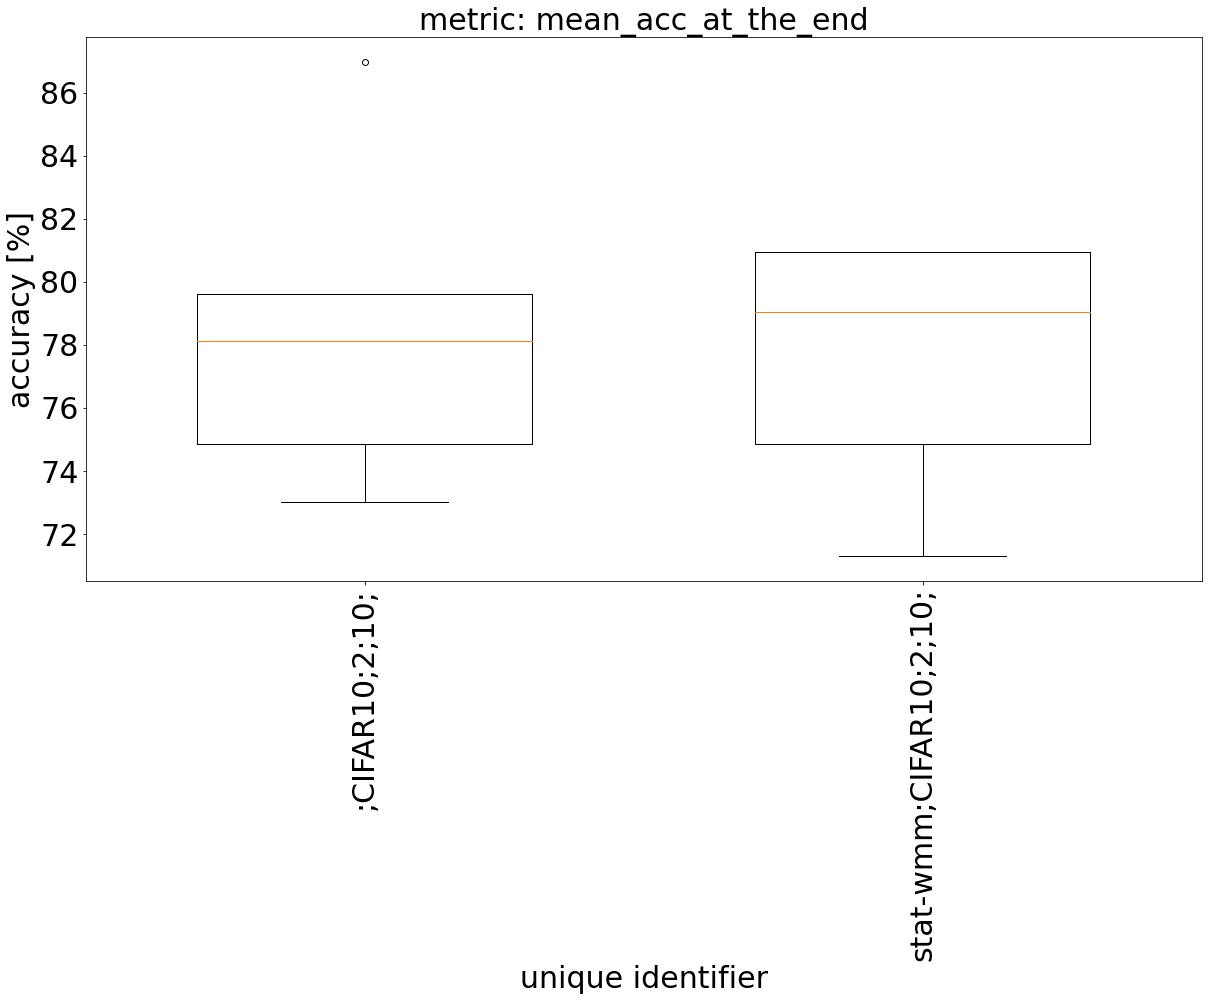

In [5]:
df = viz.metrics_df

df = df[df['dataset'] == 'CIFAR10']
# df = df[df['dataset'] == 'CIFAR100']

metric = 'mean_acc_at_the_end'
# metric = 'mean_acc_max'
# metric = 'mean_acc_mean_decrease_per_task'
# metric = 'acc_at_the_end_task_0'

box_plot(metric, df, "Con_loss_alexnet_optimizer_decrease", fontsize=30)
# box_plot(metric, df, None, fontsize=30)

In [8]:
viz.df.UID

0              ;CIFAR100;5;0;
1              ;CIFAR100;5;0;
2              ;CIFAR100;5;0;
3              ;CIFAR100;5;0;
4              ;CIFAR100;5;0;
5      stat-wmm;CIFAR100;5;0;
6      stat-wmm;CIFAR100;5;0;
7      stat-wmm;CIFAR100;5;0;
8      stat-wmm;CIFAR100;5;0;
9      stat-wmm;CIFAR100;5;0;
10    stat-wmm;CIFAR100;5;10;
11    stat-wmm;CIFAR100;5;10;
12    stat-wmm;CIFAR100;5;10;
13    stat-wmm;CIFAR100;5;10;
14    stat-wmm;CIFAR100;5;10;
15            ;CIFAR100;5;10;
16            ;CIFAR100;5;10;
17            ;CIFAR100;5;10;
18            ;CIFAR100;5;10;
19            ;CIFAR100;5;10;
20             ;CIFAR10;2;10;
21             ;CIFAR10;2;10;
22             ;CIFAR10;2;10;
23             ;CIFAR10;2;10;
24             ;CIFAR10;2;10;
25     stat-wmm;CIFAR10;2;10;
26     stat-wmm;CIFAR10;2;10;
27     stat-wmm;CIFAR10;2;10;
28     stat-wmm;CIFAR10;2;10;
29     stat-wmm;CIFAR10;2;10;
Name: UID, dtype: object

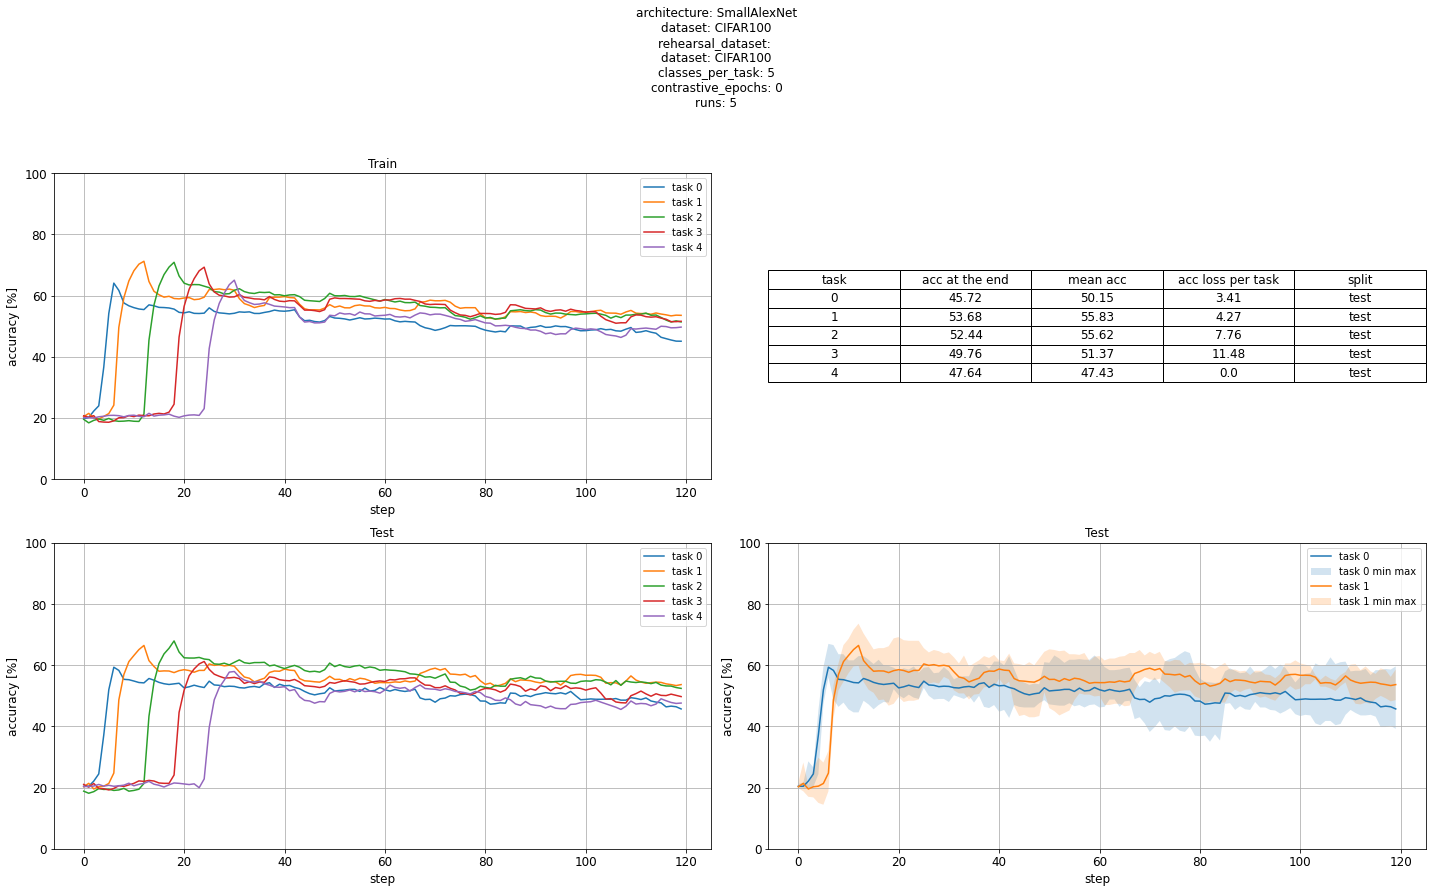

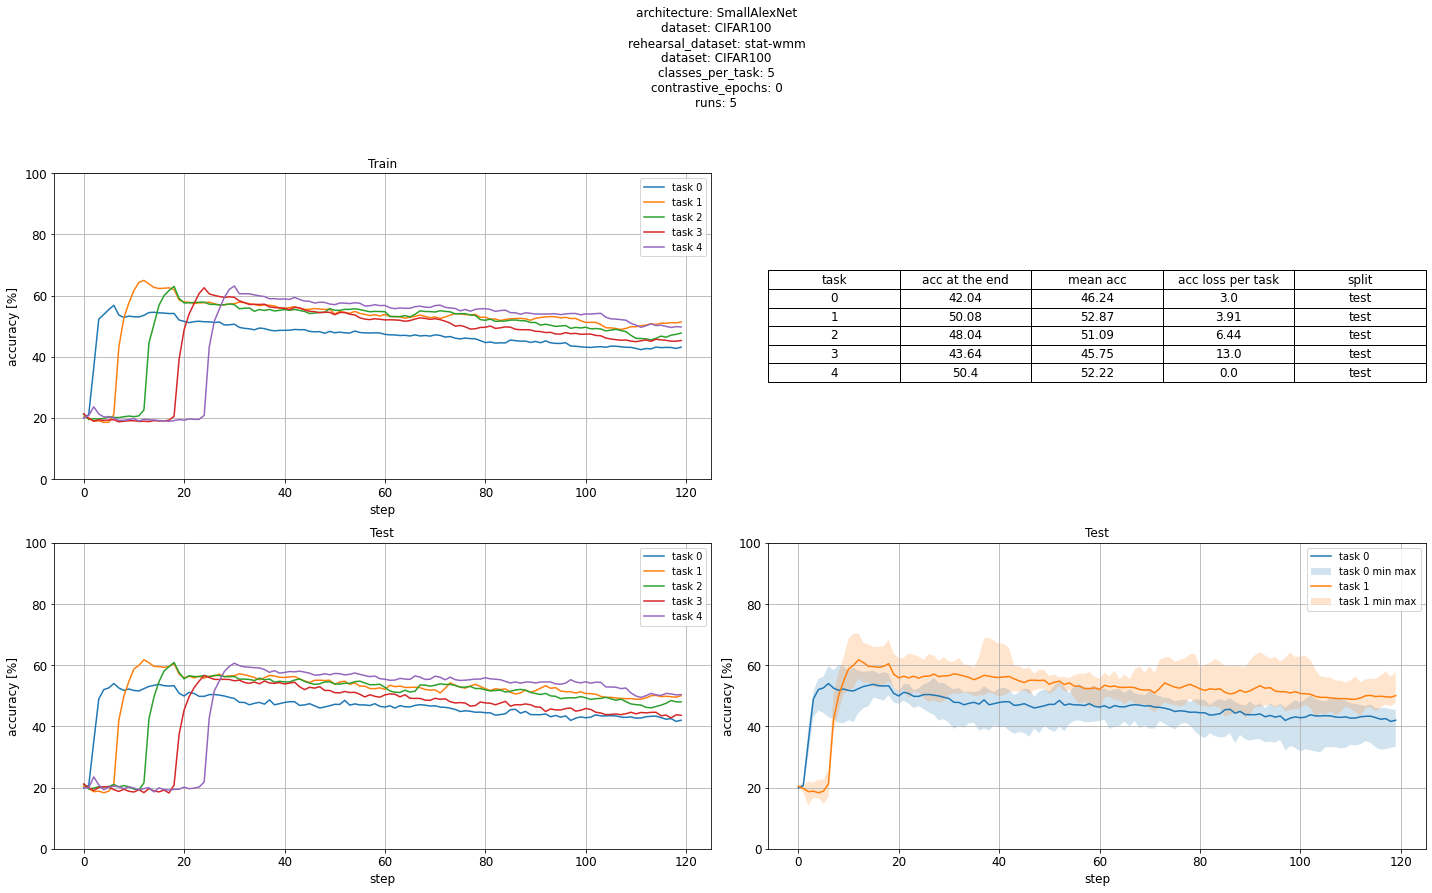

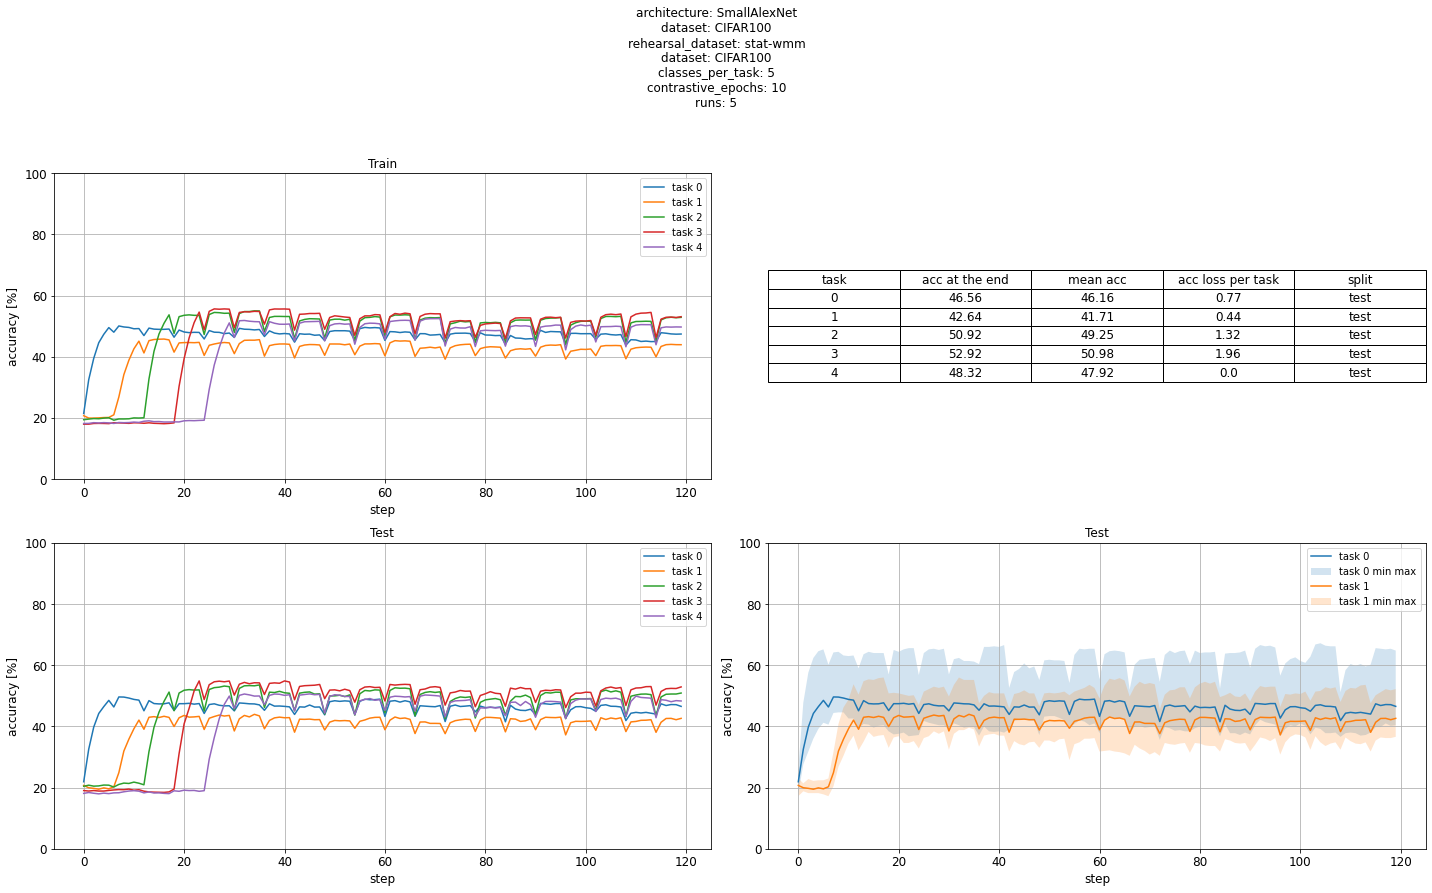

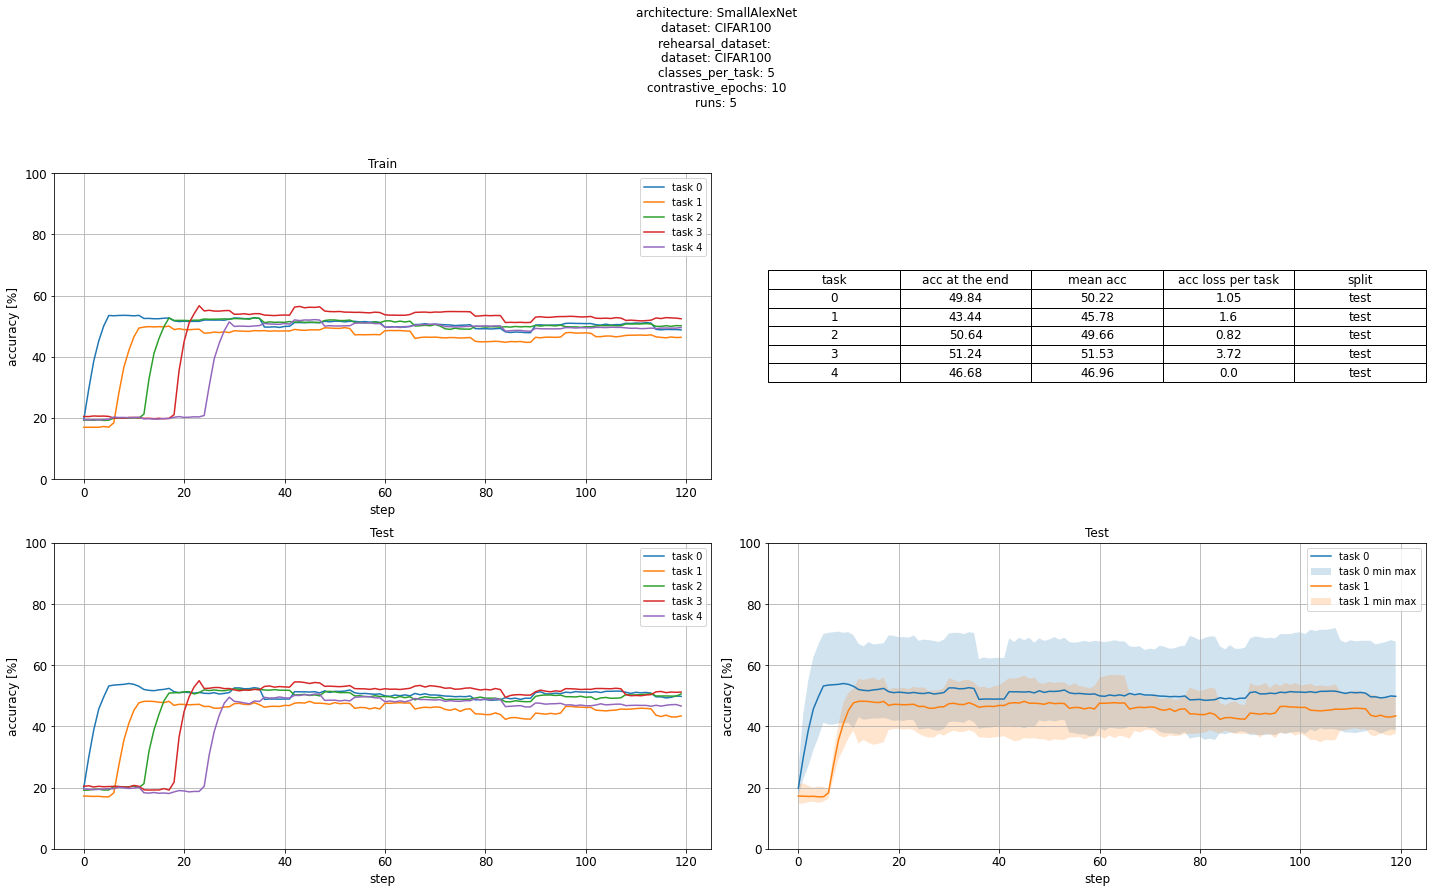

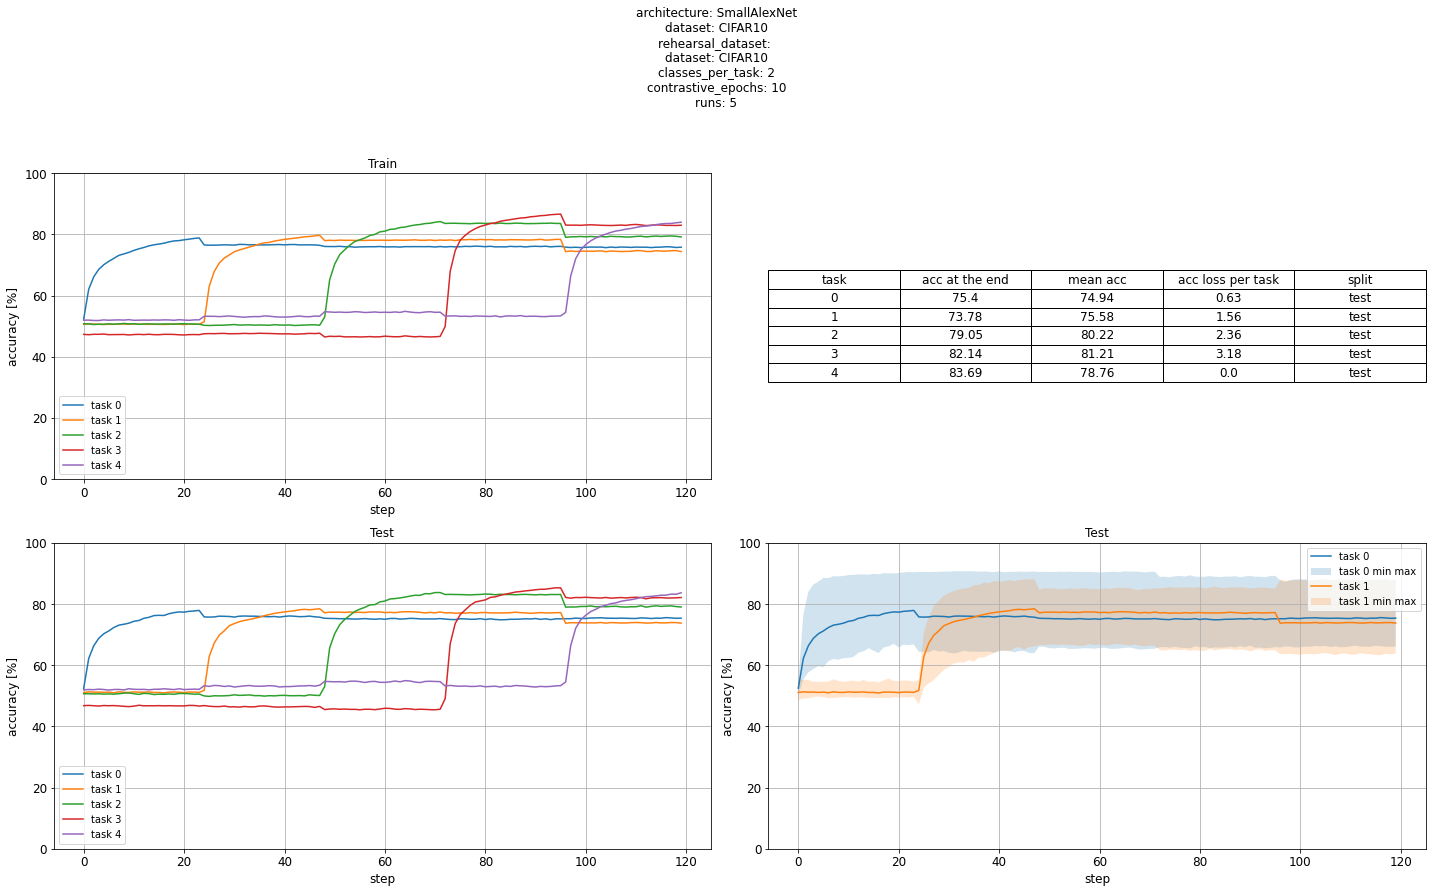

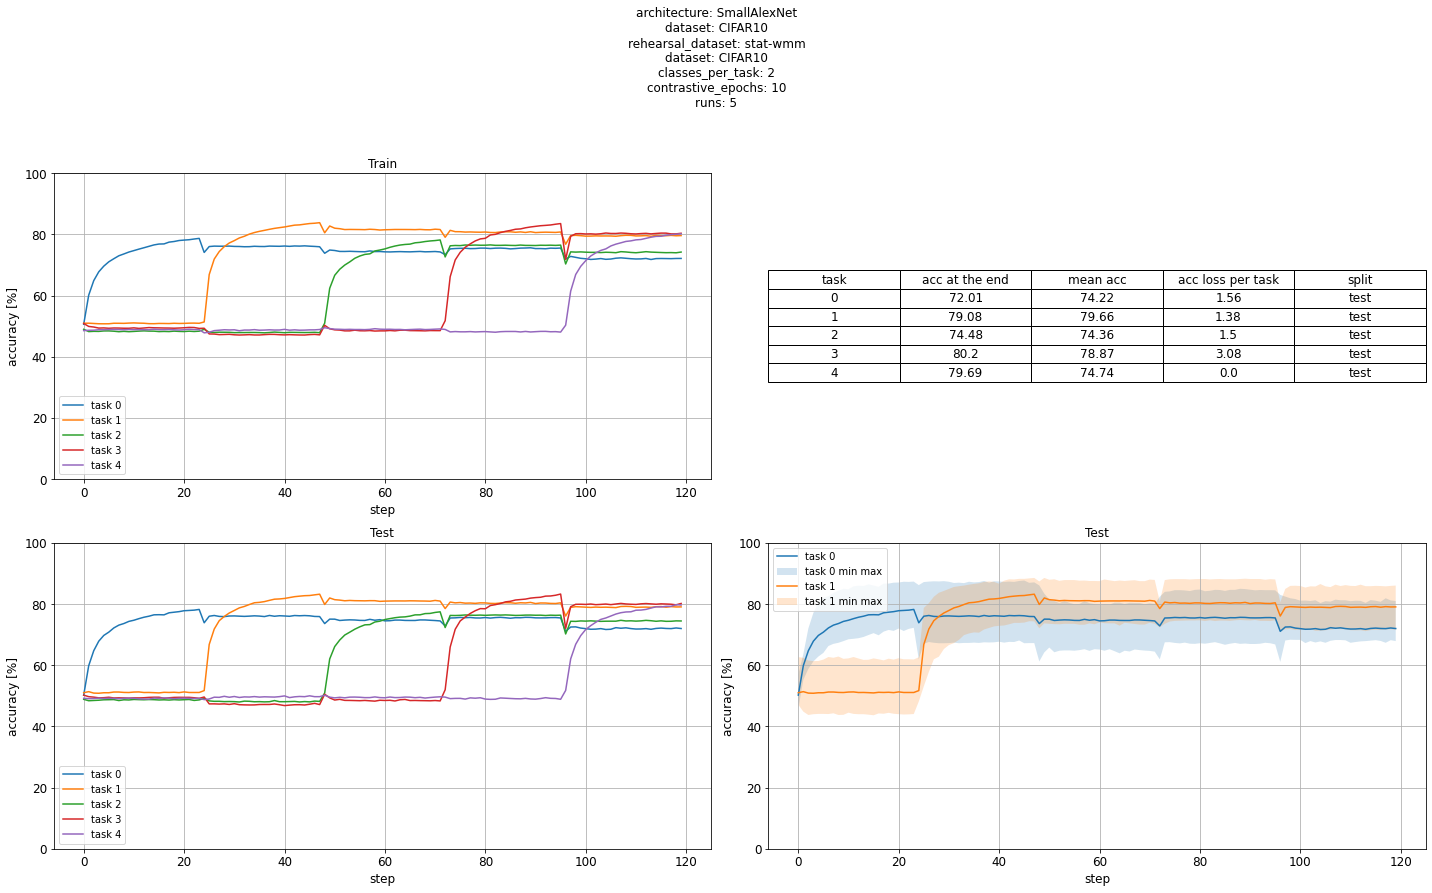

In [11]:
viz.y_min = 0
viz.plot_everything()